In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
J = np.array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
       208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304,
       312, 320, 328, 336, 344, 351])
I = np.array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
       208, 216, 221])

In [38]:
def enum_matrix(N, M, block_size, I, J):
    matrix = np.zeros((N, M)) 
    for i in I:
        for j in J:
            matrix[i:(i+block_size), j:(j+block_size)] += 1
    return matrix

In [49]:
image = cv2.imread("./test.tif")[...,::-1]
for i in I:
    for j in J:
        block = image[i:(i+32), j:(j+32)]
        if block.shape != (32, 32, 3):
            print(block.shape)
            print(i)
            print(j)

In [6]:
def pred_map(model, image, block_size, I, J):
    N, M, _ = image.shape
    pred_map = np.zeros((N, M))
    for i in I:
        for j in J:
            block = image[i:(i+block_size), j:(j+block_size)]
            label = model.predict([block])
            pred_map[i:(i+block_size), j:(j+block_size)] += label
    enum_mat = enum_matrix(N, M, block_size)
    return pred_map/enum_matrix

array([  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352])

In [55]:
l = np.load("./pred_map.npy")

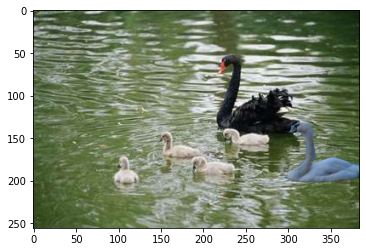

In [50]:
plt.imshow(image)

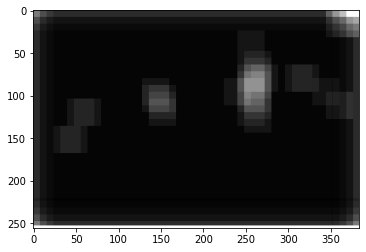

In [56]:
plt.imshow(255-l, "gray")